## 올웨더 포트폴리오

- 레벨 : 중급
- 기대 연복리수익률 : 8~10% 정도
- 포함 자산 & 매수 전략
- 표와 같이 배분
- 매도 전략 : 연 1회 리밸런싱

In [1]:
import FinanceDataReader as fdr
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
# pandas 표기 설정
pd.options.display.float_format = '{:.4f}'.format # 소수점 4자리까지 표기
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다
# pd.set_option('display.max_rows', None) # Dataframe 출력시 컬럼 생략없이 전체 표기

### 팩터 불러오기

In [2]:
# 기간 설정
# 2007년 6월 1일 부터 모든 팩터 데이터 존재
start_date = datetime(1970, 1, 2)
end_date = datetime(2022, 12, 31)

In [3]:
# 종목의 종가 수집 함수
def get_price_data(stocks, start_date, end_date):
    df_price = pd.DataFrame(columns=stocks)
    for s in stocks:
        df_price[s] = pdr.DataReader(s, 'yahoo', start_date, end_date)['Close']
    
    return df_price

In [4]:
# 종목 설정
stocks = [['SPY', 0.12], ['EFA', 0.12], ['EEM', 0.12], ['DBC', 0.07], ['GLD', 0.07],
         ['EDV', 0.18], ['LTPZ', 0.18], ['LQD', 0.07], ['EMLC', 0.07]]

In [5]:
code = [s[0] for s in stocks]
ratio = [r[1] for r in stocks]
print(code)
print(ratio)

['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'EDV', 'LTPZ', 'LQD', 'EMLC']
[0.12, 0.12, 0.12, 0.07, 0.07, 0.18, 0.18, 0.07, 0.07]


In [6]:
df = get_price_data(code, start_date, end_date)
df = df.dropna()
df

,SPY,EFA,EEM,DBC,GLD,EDV,LTPZ,LQD,EMLC
Date,,,,,,,,,
2010-07-23,110.4100,51.5900,41.1500,22.4400,116.0900,91.4200,52.8800,109.6300,50.9000
2010-07-26,111.5600,51.9500,41.4300,22.4200,115.5200,90.8700,52.8000,109.7300,51.8000
2010-07-27,111.5500,52.1000,41.3600,22.1800,113.5100,89.8100,52.8800,109.3600,51.8600
2010-07-28,110.8300,51.8300,41.1300,22.2700,113.7800,89.8300,53.1500,109.7500,51.7400
2010-07-29,110.2900,52.0700,41.2000,22.5900,114.2900,89.7100,53.1100,109.7900,51.5800
...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,42.6400,28.8000,171.1400,101.5700,70.7100,114.4400,25.6500
2022-06-01,409.5900,69.2700,42.3400,28.9400,172.2300,102.0800,69.8800,113.5000,25.3900
2022-06-02,417.3900,70.7100,43.0700,29.6000,174.3500,102.0200,70.7300,113.5500,25.6600


### 수익률, CAGR 및 MDD 구하기

In [7]:
col_list = [col for col in code]
col_list_Profit = [col+'_Profit' for col in code]
col_list_Profit

['SPY_Profit',
 'EFA_Profit',
 'EEM_Profit',
 'DBC_Profit',
 'GLD_Profit',
 'EDV_Profit',
 'LTPZ_Profit',
 'LQD_Profit',
 'EMLC_Profit']

In [8]:
# 초기자산에 대한 리밸런싱(1년) 수익 구하기
money = 10000 # 초기 자산
df['Profit'] = 10000
for i in range(len(ratio)):
    df[col_list_Profit[i]] = money * ratio[i]
df

,SPY,EFA,EEM,DBC,GLD,EDV,LTPZ,LQD,EMLC,Profit,SPY_Profit,EFA_Profit,EEM_Profit,DBC_Profit,GLD_Profit,EDV_Profit,LTPZ_Profit,LQD_Profit,EMLC_Profit
Date,,,,,,,,,,,,,,,,,,,
2010-07-23,110.4100,51.5900,41.1500,22.4400,116.0900,91.4200,52.8800,109.6300,50.9000,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
2010-07-26,111.5600,51.9500,41.4300,22.4200,115.5200,90.8700,52.8000,109.7300,51.8000,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
2010-07-27,111.5500,52.1000,41.3600,22.1800,113.5100,89.8100,52.8800,109.3600,51.8600,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
2010-07-28,110.8300,51.8300,41.1300,22.2700,113.7800,89.8300,53.1500,109.7500,51.7400,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
2010-07-29,110.2900,52.0700,41.2000,22.5900,114.2900,89.7100,53.1100,109.7900,51.5800,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,42.6400,28.8000,171.1400,101.5700,70.7100,114.4400,25.6500,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
2022-06-01,409.5900,69.2700,42.3400,28.9400,172.2300,102.0800,69.8800,113.5000,25.3900,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000
2022-06-02,417.3900,70.7100,43.0700,29.6000,174.3500,102.0200,70.7300,113.5500,25.6600,10000,1200.0000,1200.0000,1200.0000,700.0000,700.0000,1800.0000,1800.0000,700.0000,700.0000


In [9]:
for i in range(1, len(df)):
    for j in range(0, len(col_list)):
        df[col_list_Profit[j]].iloc[i] = df[col_list_Profit[j]].iloc[i-1] * ( df[col_list[j]].iloc[i] / df[col_list[j]].iloc[i-1])
    df['Profit'][i] = df[col_list_Profit].iloc[i].sum()
    
    if str(df.index[i].year) != str(df.index[i-1].year): # 1년 주기 리밸런싱
        money = df['Profit'].iloc[i]
        for i in range(len(ratio)):
            df[col_list_Profit[i]] = money * ratio[i]
        
df

,SPY,EFA,EEM,DBC,GLD,EDV,LTPZ,LQD,EMLC,Profit,SPY_Profit,EFA_Profit,EEM_Profit,DBC_Profit,GLD_Profit,EDV_Profit,LTPZ_Profit,LQD_Profit,EMLC_Profit
Date,,,,,,,,,,,,,,,,,,,
2010-07-23,110.4100,51.5900,41.1500,22.4400,116.0900,91.4200,52.8800,109.6300,50.9000,10000,1963.6800,1963.6800,1963.6800,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800
2010-07-26,111.5600,51.9500,41.4300,22.4200,115.5200,90.8700,52.8000,109.7300,51.8000,10024,1963.6800,1963.6800,1963.6800,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800
2010-07-27,111.5500,52.1000,41.3600,22.1800,113.5100,89.8100,52.8800,109.3600,51.8600,9986,1963.6800,1963.6800,1963.6800,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800
2010-07-28,110.8300,51.8300,41.1300,22.2700,113.7800,89.8300,53.1500,109.7500,51.7400,9980,1963.6800,1963.6800,1963.6800,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800
2010-07-29,110.2900,52.0700,41.2000,22.5900,114.2900,89.7100,53.1100,109.7900,51.5800,9989,1963.6800,1963.6800,1963.6800,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,42.6400,28.8000,171.1400,101.5700,70.7100,114.4400,25.6500,14449,1697.3946,1736.0429,1701.8559,1581.4872,1164.6019,2205.8280,2332.8598,999.8378,1029.8479
2022-06-01,409.5900,69.2700,42.3400,28.9400,172.2300,102.0800,69.8800,113.5000,25.3900,14385,1683.6652,1717.6929,1689.8823,1589.1750,1172.0193,2216.9039,2305.4764,991.6252,1019.4089
2022-06-02,417.3900,70.7100,43.0700,29.6000,174.3500,102.0200,70.7300,113.5500,25.6600,14571,1715.7280,1753.4008,1719.0182,1625.4174,1186.4459,2215.6007,2333.5197,992.0621,1030.2494


In [10]:
df['Profit_P'] = df['Profit'].pct_change() # 수익률
df['Profit_PA'] = (1+df['Profit_P']).cumprod()-1 # 누적 수익률
df['Profit_LP'] = np.log(df['Profit_P']+1) # log 수익률
df['Profit_LPA'] = df['Profit_LP'].cumsum() # log 수익률

df[['Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA']] *= 100
df

,SPY,EFA,EEM,DBC,GLD,EDV,LTPZ,LQD,EMLC,Profit,...,DBC_Profit,GLD_Profit,EDV_Profit,LTPZ_Profit,LQD_Profit,EMLC_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-23,110.4100,51.5900,41.1500,22.4400,116.0900,91.4200,52.8800,109.6300,50.9000,10000,...,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,NaN,NaN,NaN,NaN
2010-07-26,111.5600,51.9500,41.4300,22.4200,115.5200,90.8700,52.8000,109.7300,51.8000,10024,...,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,0.2400,0.2400,0.2397,0.2397
2010-07-27,111.5500,52.1000,41.3600,22.1800,113.5100,89.8100,52.8800,109.3600,51.8600,9986,...,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,-0.3791,-0.1400,-0.3798,-0.1401
2010-07-28,110.8300,51.8300,41.1300,22.2700,113.7800,89.8300,53.1500,109.7500,51.7400,9980,...,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,-0.0601,-0.2000,-0.0601,-0.2002
2010-07-29,110.2900,52.0700,41.2000,22.5900,114.2900,89.7100,53.1100,109.7900,51.5800,9989,...,1145.4800,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,0.0902,-0.1100,0.0901,-0.1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,42.6400,28.8000,171.1400,101.5700,70.7100,114.4400,25.6500,14449,...,1581.4872,1164.6019,2205.8280,2332.8598,999.8378,1029.8479,-1.0139,44.4900,-1.0191,36.8040
2022-06-01,409.5900,69.2700,42.3400,28.9400,172.2300,102.0800,69.8800,113.5000,25.3900,14385,...,1589.1750,1172.0193,2216.9039,2305.4764,991.6252,1019.4089,-0.4429,43.8500,-0.4439,36.3601
2022-06-02,417.3900,70.7100,43.0700,29.6000,174.3500,102.0200,70.7300,113.5500,25.6600,14571,...,1625.4174,1186.4459,2215.6007,2333.5197,992.0621,1030.2494,1.2930,45.7100,1.2847,37.6448


In [11]:
# 복리수익률 계산 함수
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

In [12]:
df['CAGR'] = np.nan

fprice = df['Profit'][0]
df['CAGR'][0] = 0
idx = 0
years = 1
for row in range(1, len(df)):
    if str(df.index[row].year) != str(df.index[row-1].year):
        df['CAGR'][row] = CAGR(fprice, df['Profit'][row], years)
        idx = i
        years += 1
    else:
        df['CAGR'][row] = df['CAGR'][row-1]
df

,SPY,EFA,EEM,DBC,GLD,EDV,LTPZ,LQD,EMLC,Profit,...,GLD_Profit,EDV_Profit,LTPZ_Profit,LQD_Profit,EMLC_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-23,110.4100,51.5900,41.1500,22.4400,116.0900,91.4200,52.8800,109.6300,50.9000,10000,...,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,NaN,NaN,NaN,NaN,0.0000
2010-07-26,111.5600,51.9500,41.4300,22.4200,115.5200,90.8700,52.8000,109.7300,51.8000,10024,...,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,0.2400,0.2400,0.2397,0.2397,0.0000
2010-07-27,111.5500,52.1000,41.3600,22.1800,113.5100,89.8100,52.8800,109.3600,51.8600,9986,...,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,-0.3791,-0.1400,-0.3798,-0.1401,0.0000
2010-07-28,110.8300,51.8300,41.1300,22.2700,113.7800,89.8300,53.1500,109.7500,51.7400,9980,...,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,-0.0601,-0.2000,-0.0601,-0.2002,0.0000
2010-07-29,110.2900,52.0700,41.2000,22.5900,114.2900,89.7100,53.1100,109.7900,51.5800,9989,...,1145.4800,2945.5200,2945.5200,1145.4800,1145.4800,0.0902,-0.1100,0.0901,-0.1101,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,42.6400,28.8000,171.1400,101.5700,70.7100,114.4400,25.6500,14449,...,1164.6019,2205.8280,2332.8598,999.8378,1029.8479,-1.0139,44.4900,-1.0191,36.8040,4.1895
2022-06-01,409.5900,69.2700,42.3400,28.9400,172.2300,102.0800,69.8800,113.5000,25.3900,14385,...,1172.0193,2216.9039,2305.4764,991.6252,1019.4089,-0.4429,43.8500,-0.4439,36.3601,4.1895
2022-06-02,417.3900,70.7100,43.0700,29.6000,174.3500,102.0200,70.7300,113.5500,25.6600,14571,...,1186.4459,2215.6007,2333.5197,992.0621,1030.2494,1.2930,45.7100,1.2847,37.6448,4.1895


In [13]:
# MDD 계산
window = 252
Roll_Max = df['Profit'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Profit']/ Roll_Max -1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
df['DD'] = Daily_Drawdown * 100
df['MDD'] = Max_Daily_Drawdown * 100

In [14]:
df = df[['SPY', 'EFA', 'EEM', 'DBC', 'GLD', 'EDV', 'LTPZ', 'LQD', 'EMLC', 'Profit', 'Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA', 'CAGR', 'DD', 'MDD']]
print(f"포트폴리오 최대 MDD: {df['MDD'].min():.2f}%")
df

포트폴리오 최대 MDD: -18.95%


,SPY,EFA,EEM,DBC,GLD,EDV,LTPZ,LQD,EMLC,Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR,DD,MDD
Date,,,,,,,,,,,,,,,,,
2010-07-23,110.4100,51.5900,41.1500,22.4400,116.0900,91.4200,52.8800,109.6300,50.9000,10000,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
2010-07-26,111.5600,51.9500,41.4300,22.4200,115.5200,90.8700,52.8000,109.7300,51.8000,10024,0.2400,0.2400,0.2397,0.2397,0.0000,0.0000,0.0000
2010-07-27,111.5500,52.1000,41.3600,22.1800,113.5100,89.8100,52.8800,109.3600,51.8600,9986,-0.3791,-0.1400,-0.3798,-0.1401,0.0000,-0.3791,-0.3791
2010-07-28,110.8300,51.8300,41.1300,22.2700,113.7800,89.8300,53.1500,109.7500,51.7400,9980,-0.0601,-0.2000,-0.0601,-0.2002,0.0000,-0.4389,-0.4389
2010-07-29,110.2900,52.0700,41.2000,22.5900,114.2900,89.7100,53.1100,109.7900,51.5800,9989,0.0902,-0.1100,0.0901,-0.1101,0.0000,-0.3492,-0.4389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,42.6400,28.8000,171.1400,101.5700,70.7100,114.4400,25.6500,14449,-1.0139,44.4900,-1.0191,36.8040,4.1895,-14.3712,-17.2336
2022-06-01,409.5900,69.2700,42.3400,28.9400,172.2300,102.0800,69.8800,113.5000,25.3900,14385,-0.4429,43.8500,-0.4439,36.3601,4.1895,-14.7505,-17.2336
2022-06-02,417.3900,70.7100,43.0700,29.6000,174.3500,102.0200,70.7300,113.5500,25.6600,14571,1.2930,45.7100,1.2847,37.6448,4.1895,-13.6482,-17.2336


### 데이터 시각화

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date'>

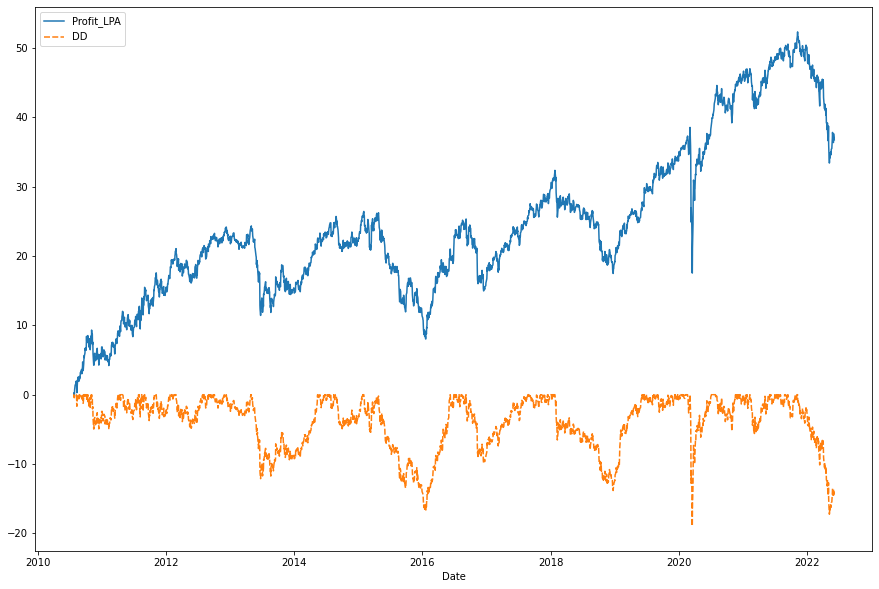

In [16]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['Profit_LPA', 'DD']])

<AxesSubplot:xlabel='Date'>

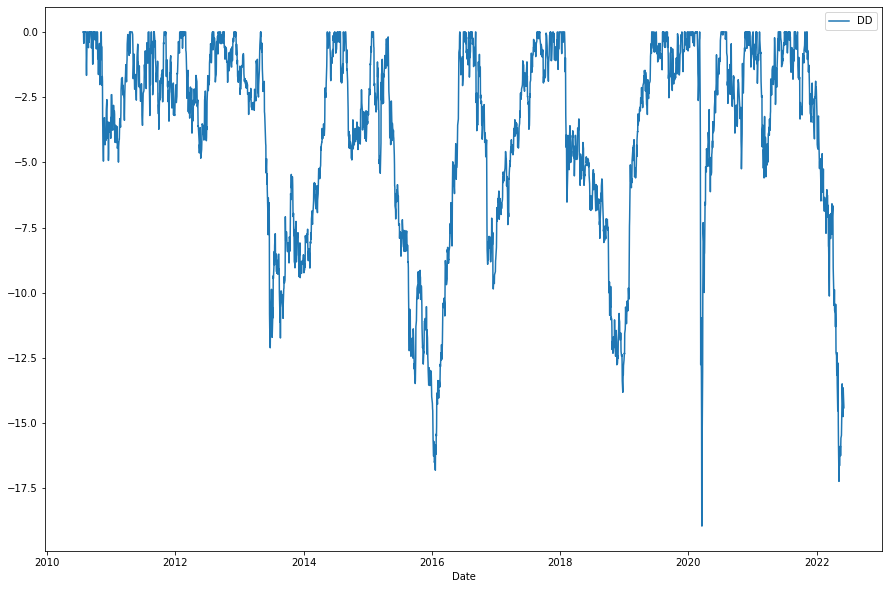

In [17]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['DD']])

## Historical Market Stress Periods 기능 Python Coding

In [18]:
stress_period = pd.DataFrame([['Oil Crisis', '1973-10-01', '1974-03-31'],
                             ['Black Monday Period', '1987-09-01', '1987-11-30'],
                             ['Asian Crisis', '1997-07-01', '1998-01-31'],
                             ['Russian Debt Default', '1998-07-01', '1998-01-31'],
                             ['Dotcom Crash', '2000-03-01', '2002-10-31'],
                             ['Subprime Crisis', '2007-11-01', '2009-03-31'],
                             ['COVID-19 Start', '2020-01-01', '2022-03-01']], 
                             columns=['Stress Period', 'Start', 'End'])
stress_period

,Stress Period,Start,End
0,Oil Crisis,1973-10-01,1974-03-31
1,Black Monday Period,1987-09-01,1987-11-30
2,Asian Crisis,1997-07-01,1998-01-31
3,Russian Debt Default,1998-07-01,1998-01-31
4,Dotcom Crash,2000-03-01,2002-10-31
5,Subprime Crisis,2007-11-01,2009-03-31
6,COVID-19 Start,2020-01-01,2022-03-01


In [19]:
stress_period['DD'] = np.nan
for i in range(len(stress_period)):
    stress_period['DD'][i] = df['DD'].loc[stress_period['Start'][i]:stress_period['End'][i]].min()
    stress_period['Start'][i] = str(stress_period['Start'][i])[:7] # '%Y-%m'
    stress_period['End'][i] = str(stress_period['End'][i])[:7]
stress_period = stress_period.dropna() # 결측치 제거
stress_period = stress_period.reset_index(drop=True)
stress_period

,Stress Period,Start,End,DD
0,COVID-19 Start,2020-01,2022-03,-18.9485


## Drawdowns for Portfolio 1 기능 Python Coding

In [20]:
day0 = []
for i in range(len(df)):
    if df['DD'][i] == 0:
        day0.append(df.index[i])
day0

[Timestamp('2010-07-23 00:00:00'),
 Timestamp('2010-07-26 00:00:00'),
 Timestamp('2010-07-30 00:00:00'),
 Timestamp('2010-08-02 00:00:00'),
 Timestamp('2010-08-03 00:00:00'),
 Timestamp('2010-08-05 00:00:00'),
 Timestamp('2010-08-06 00:00:00'),
 Timestamp('2010-08-09 00:00:00'),
 Timestamp('2010-08-16 00:00:00'),
 Timestamp('2010-08-17 00:00:00'),
 Timestamp('2010-08-18 00:00:00'),
 Timestamp('2010-08-19 00:00:00'),
 Timestamp('2010-08-26 00:00:00'),
 Timestamp('2010-08-31 00:00:00'),
 Timestamp('2010-09-01 00:00:00'),
 Timestamp('2010-09-03 00:00:00'),
 Timestamp('2010-09-07 00:00:00'),
 Timestamp('2010-09-08 00:00:00'),
 Timestamp('2010-09-13 00:00:00'),
 Timestamp('2010-09-14 00:00:00'),
 Timestamp('2010-09-21 00:00:00'),
 Timestamp('2010-09-22 00:00:00'),
 Timestamp('2010-09-24 00:00:00'),
 Timestamp('2010-09-27 00:00:00'),
 Timestamp('2010-09-28 00:00:00'),
 Timestamp('2010-10-05 00:00:00'),
 Timestamp('2010-10-06 00:00:00'),
 Timestamp('2010-10-13 00:00:00'),
 Timestamp('2010-11-

In [21]:
Portfolio = pd.DataFrame(
    columns=['Start', 'End', 'Length(day)', 'Recovery By', 'Recovery Time(day)', 'Underwater Period(day)', 'Drawdown'])

for i in range(1, len(day0)):
    Start = day0[i-1] # Drawdown 시작일
    pcost = df['Profit'].loc[Start] # Drawdown 시작일 자산
    UnderWaterEndDay = day0[i] # UnderWaterEnd Day

    dt = df.loc[Start:UnderWaterEndDay] # Drawdown 기간 dataframe
    
    t = df.loc[Start:]
    for j in range(1, len(t)):
        if t['Profit'][j] >= pcost: # Recovery day
            RecoveryBy = t.index[j]
            break
    
    UnderWaterPeriod = UnderWaterEndDay - Start # UnderWater Period
    
    dd = dt['DD'].min() # Drawdown
    if dd == 0.0:
        continue
    End = dt['DD'].idxmin() # Drawdown Date
    Length = End - Start # Drawdown days
    RecoveryTime = RecoveryBy - End # 회복하는데 걸린 시간
    
    temp = [str(Start)[:10], str(End)[:10], Length.days, str(RecoveryBy)[:10], RecoveryTime.days, UnderWaterPeriod.days, dd]
    Portfolio = Portfolio.append(pd.Series(temp, index=Portfolio.columns), ignore_index=True)

In [22]:
Portfolio = Portfolio.sort_values(by=['Drawdown'])
Portfolio = Portfolio.reset_index(drop=True)
Portfolio.index = Portfolio.index + 1
Portfolio.index.name = 'Rank'

In [23]:
Portfolio.head(10)

,Start,End,Length(day),Recovery By,Recovery Time(day),Underwater Period(day),Drawdown
Rank,,,,,,,
1,2020-03-06,2020-03-19,13,2020-07-06,109,122,-18.9485
2,2015-02-02,2016-01-21,353,2017-08-31,588,492,-16.8061
3,2018-01-26,2018-12-24,332,2019-08-27,246,497,-13.8205
4,2013-05-02,2013-06-24,53,2014-07-22,393,378,-12.1119
5,2016-09-07,2016-12-16,100,2017-08-23,250,350,-9.8572
6,2021-02-10,2021-03-08,26,2021-05-28,81,107,-5.5993
7,2020-08-06,2020-10-30,85,2020-11-20,21,106,-5.2497
8,2010-11-04,2011-02-10,98,2011-04-15,64,162,-4.9923
9,2014-08-28,2014-10-02,35,2015-01-23,113,148,-4.9107
